In [1]:
# problem definition


machine learning workflow
PLEDETF
1. Problem Definition
2. Load the packages
3. Exploratory Data analysis
4. Data Cleaning
5. Model Evaluation
6. Model Tuning
7. Finalize the model


In [58]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading the preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder

# import libraries for checking for colinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from phik.phik import phik_from_array
from phik.significance import significance_from_array

# model evaluation
from sklearn.model_selection import train_test_split, GridSearchCV

# importing the metrics libraries 
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import recall_score, accuracy_score, RocCurveDisplay

# import serial libraries
import pickle

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/zobekenobe/Files/main/breast%20cancer.csv')

In [10]:
# checking the shape of the dataset
df.shape

(569, 33)

In [11]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
# the last column is full of nans so we drop it immediately
df.drop(df.columns[-1], axis = 1, inplace = True)

In [15]:
df.set_index('id', inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [17]:
# checking the diagnosis (target variable) distribution
df['diagnosis'].value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [19]:
# we change the target variable i.e. diagnosis into 
df['diagnosis'] = df['diagnosis'].map({'B':0, 'M':1})

In [21]:
# checking the descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [22]:
# checking for null values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

no null values are present so we can move ahead

In [38]:
# choosing features using select k best
features_selector = SelectKBest().fit(df.drop('diagnosis', axis = 1), df['diagnosis'])

In [45]:
best_features = pd.DataFrame({'Feature Scores':features_selector.scores_}, index = df.drop('diagnosis', axis = 1).columns).sort_values('Feature Scores',ascending = False)

In [48]:
best_features.iloc[:17, :]

,Feature Scores
concave points_worst,964.385393
perimeter_worst,897.944219
concave points_mean,861.676020
radius_worst,860.781707
perimeter_mean,697.235272
area_worst,661.600206
radius_mean,646.981021
area_mean,573.060747
concavity_mean,533.793126
concavity_worst,436.691939


In [51]:
# selecting the top 17 features
selected_features = best_features.iloc[:17,:].index

In [54]:
x_best = df[selected_features]
y = df['diagnosis']

In [55]:
# scaling the features 
scaler = StandardScaler().fit(x_best)

In [56]:
xscaled = scaler.transform(x_best)

In [59]:
# split the training and test dataset
xtrain, xtest, ytrain, ytest = train_test_split(xscaled, y, test_size = 0.25, random_state = 42)

In [60]:
# predicting using different classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [61]:
# instantiate the models
lr = LogisticRegression()
knn= KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [62]:
# train all the models
lr.fit(xtrain, ytrain)
knn.fit(xtrain, ytrain)
dt.fit(xtrain, ytrain)
rf.fit(xtrain, ytrain)

RandomForestClassifier()

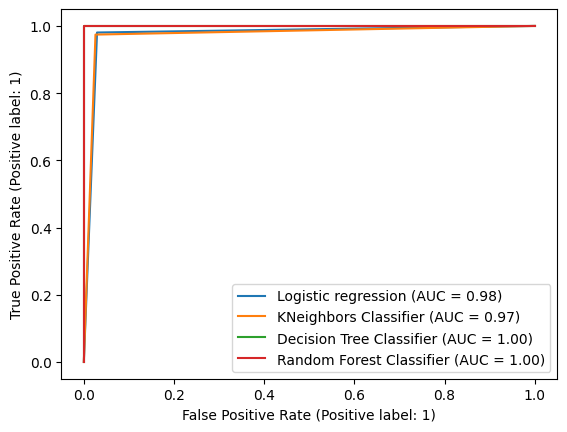

In [63]:
# checking for the predictive abilities based on the training dataset
fig, ax = plt.subplots()
RocCurveDisplay.from_predictions(lr.predict(xtrain), ytrain, name='Logistic regression', ax = ax)
RocCurveDisplay.from_predictions(knn.predict(xtrain), ytrain, name = 'KNeighbors Classifier', ax = ax)
RocCurveDisplay.from_predictions(dt.predict(xtrain), ytrain, name = 'Decision Tree Classifier', ax = ax)
RocCurveDisplay.from_predictions(rf.predict(xtrain), ytrain, name = 'Random Forest Classifier', ax = ax)
plt.show()

seems to be overfitting we check for the confusion matrix and the recall score for the logistic regression and KNN classifier model

<Figure size 1000x1000 with 0 Axes>

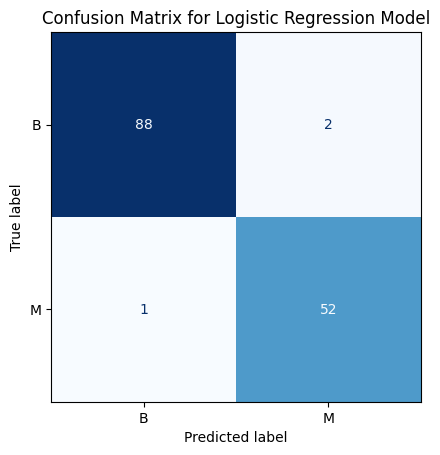

In [80]:
plt.figure(figsize = (10, 10))
cmd.from_predictions(lr.predict(xtest), ytest, display_labels = ['B', 'M'], cmap = 'Blues', colorbar = False)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [81]:
recall_score(lr.predict(xtest), ytest)

0.9811320754716981

<Figure size 1000x1000 with 0 Axes>

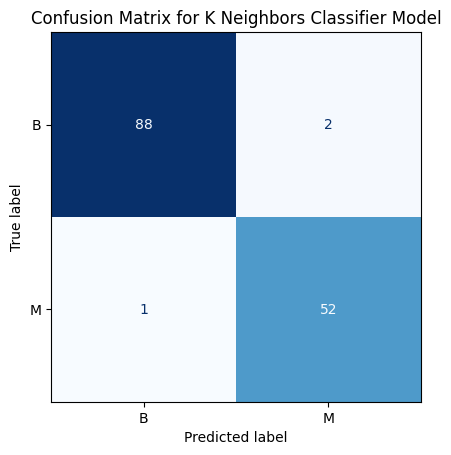

In [82]:
# checking for the KNN model
plt.figure(figsize = (10, 10))
cmd.from_predictions(knn.predict(xtest), ytest, display_labels = ['B', 'M'], cmap = 'Blues', colorbar = False)
plt.title('Confusion Matrix for K Neighbors Classifier Model')
plt.show()

In [83]:
recall_score(knn.predict(xtest), ytest)

0.9811320754716981

In [74]:
# choosing the KNN Classifier to tune and see if it improves the model
gcv = GridSearchCV(KNeighborsClassifier(), param_grid = {'algorithm':['kd_tree', 'brute'], 'leaf_size':[1,3,14, 19], 'n_neighbors': [3,5,7,9]})

In [75]:
gcv.fit(xtrain, ytrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [1, 3, 14, 19],
                         'n_neighbors': [3, 5, 7, 9]})

In [76]:
best_model = gcv.best_estimator_

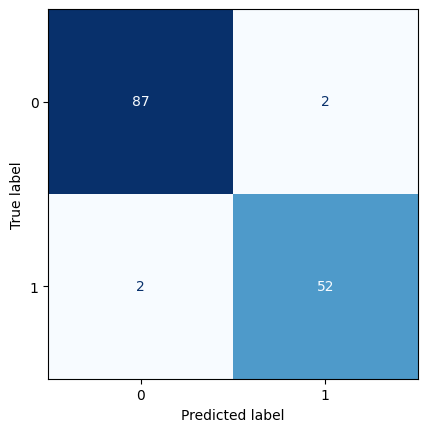

In [84]:
cmd.from_predictions(best_model.predict(xtest),ytest, cmap = 'Blues', colorbar= False) 

In [85]:
# recall 
recall_score(best_model.predict(xtest), ytest)

0.9629629629629629

In [86]:
# now the recall score has dropped after fine tuning, so we will stick with the original model for KNN
with open('breast_cancer.pkl', 'rb') as f:
    pickle.dump([scaler, knn], f)

FileNotFoundError: [Errno 2] No such file or directory: 'breast_cancer.pkl'